## Helper functions

In [28]:
%load_ext autoreload
%autoreload 2

import clique_discovery 
from helpers import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Still Failing Examples

[('l', 'k'), ('k', 'l')]


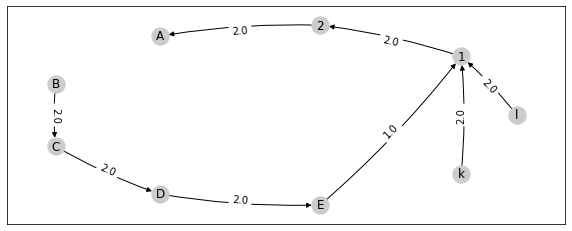

1 2 2.0 1.0
2 1 1.0 2.0
2 A 2.0 0.67
A 2 0.67 2.0
A B 2.0 1.0
B A 1.0 2.0
B C 2.0 1.0
C B 1.0 2.0
l k 1.33 0.33
k l 0.33 1.33


In [100]:
combined_loops = [
    list("lklk1212ABCDEABCDEABCDE1212"),
    list("lk12ABCDEABCDE"),
    list("lk12ABCDE"),

]
inferred_paths = clique_discovery.infer_paths_from_traces( combined_loops )
# nice_graph( inferred_paths )
untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ) )

G = clique_discovery.created_auxiliary_graph( inferred_paths )
for a in list("12ABClk"):
    for b in list("12ABClk"):
        try:
            print (a, b, G.edges[a, b]["weight"], G.edges[b, a]["weight"])
        except:
            pass

{1.5: [['B', 'd', 'e', 'f'], ['A', 'd', 'e', 'f'], ['C', 'd', 'e', 'f']], 1.25: [['1', 'f'], ['1', 'd'], ['1', 'e'], ['2', 'f'], ['2', 'd'], ['2', 'e']], 1.0: [['F', 'G']], 0.75: [['A', 'B', 'C', 'G'], ['f', 'e', 'd', 'G'], ['A', 'B', 'C', 'F'], ['f', 'e', 'd', 'F']], 0.5: [['h', 'j', 'k'], ['1', '2', 'A'], ['1', '2', 'F'], ['1', '2', 'B'], ['1', '2', 'C'], ['1', '2', 'G']], 0.25: [['k', 'j', 'h', 'G'], ['k', 'j', 'h', 'F'], ['3', '4', 'e'], ['3', '4', 'A'], ['3', '4', 'F'], ['3', '4', 'B'], ['3', '4', 'C'], ['3', '4', 'G'], ['3', '4', 'f'], ['3', '4', 'd']]}


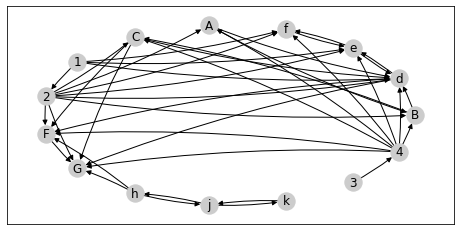

[('d', 'e'), ('e', 'd'), ('e', 'f'), ('f', 'e'), ('h', 'j'), ('j', 'h'), ('j', 'k'), ('k', 'j')]


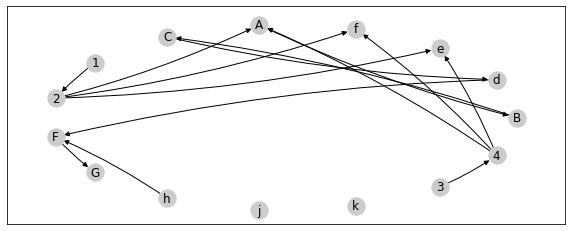

In [101]:
loop_inside = [
    list("12ABCdefdefFG"),
    list("12ABCdefdefdefFG"),
    list("34ABCdefFG"),
    list("hjkhjkFG")
]
inferred_paths = clique_discovery.infer_paths_from_traces( loop_inside )
nice_graph( inferred_paths, with_weigths=False )
untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ), with_weigths=False )
# inferred_paths

{3.0: [['1', 'A', 'B', 'C', 'D'], ['2', 'A', 'B', 'C', 'D']], 2.0: [['1', 'e', 'f'], ['2', 'e', 'f']], 1.0: [['1', '2'], ['f', 'e']]}


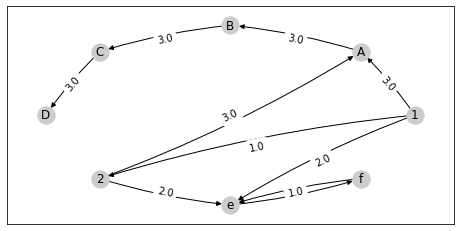

[]


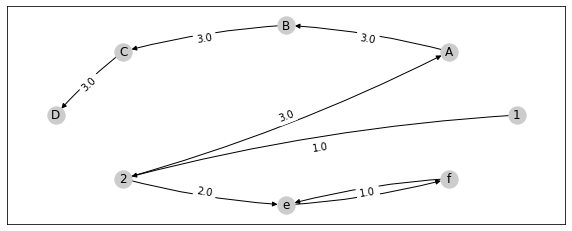

In [103]:
head_with_loop = [
    list("12ABCDefABCDABCDef"),
]
inferred_paths = clique_discovery.infer_paths_from_traces( head_with_loop )
nice_graph( inferred_paths )
untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ) )

## Successful Examples

{1.0: [['A', 'B', 'C', 'D', 'E']]}


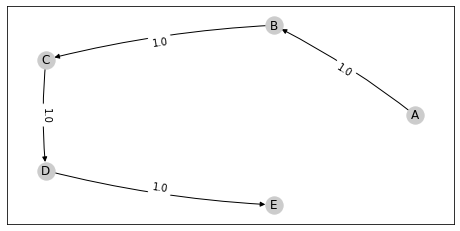

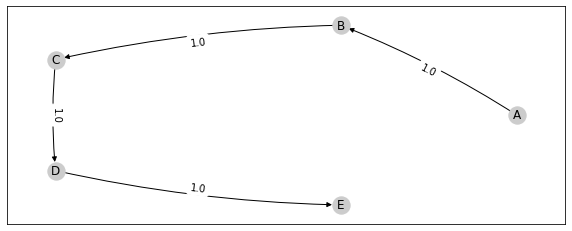

In [29]:
single_path = [ list("ABCDE") ]

inferred_paths = clique_discovery.infer_paths_from_traces( single_path )
nice_graph( inferred_paths )
untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ) )

{0.5: [['A', 'B', 'C'], ['1', '2', '3', '4']]}


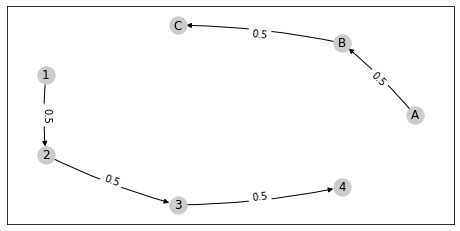

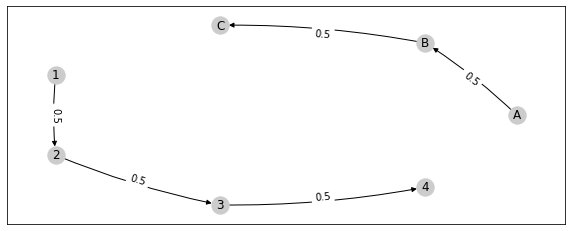

In [30]:
two_single_paths = [
    list("ABC"),
    list("1234")
]
inferred_paths = clique_discovery.infer_paths_from_traces( two_single_paths )
nice_graph( inferred_paths )
untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ) )

{0.9999999999999999: [['A', 'B', 'C', 'E', 'G']], 0.8333333333333333: [['A', 'D'], ['D', 'E'], ['B', 'D'], ['C', 'D'], ['D', 'G'], ['A', 'F'], ['E', 'F'], ['B', 'F'], ['C', 'F'], ['F', 'G']], 0.6666666666666666: [['D', 'F']]}


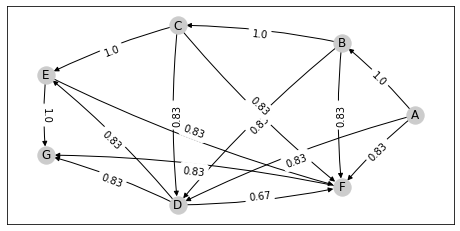

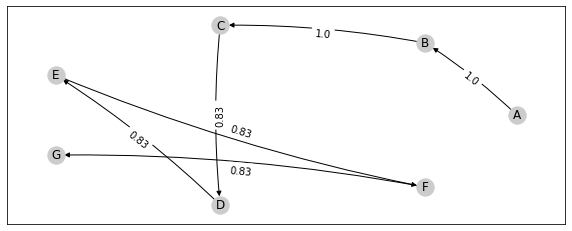

In [31]:
# With errors in the middle
truncated_trace = [
    list("ABCDEFG"),
    list("ABCDEG"),
    list("ABCDEFG"),
    list("ABCDEFG"),
    list("ABCDEFG"),
    list("ABCEFG"),
]
inferred_paths = clique_discovery.infer_paths_from_traces( truncated_trace)
nice_graph( inferred_paths )

untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ) )

{2.0: [['A', 'B', 'C']], 1.0: [['C', 'B', 'A']]}


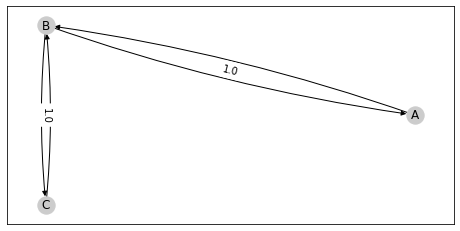

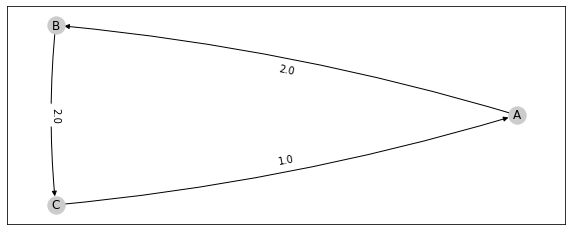

In [32]:
loop = [list("ABCABC")]
inferred_paths = clique_discovery.infer_paths_from_traces( loop )
nice_graph( inferred_paths )
untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ) )

[]


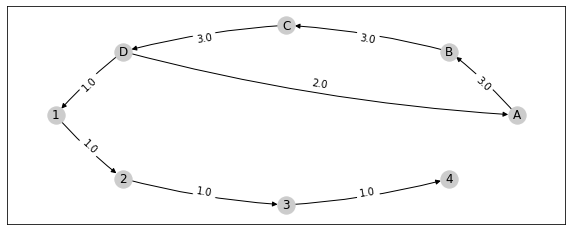

A B 3.0 2.0
B A 2.0 3.0


In [102]:
loop_with_tail = [
    list("ABCDABCDABCD1234"),
]
inferred_paths = clique_discovery.infer_paths_from_traces( loop_with_tail )
# nice_graph( inferred_paths )
untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ) )

G = clique_discovery.created_auxiliary_graph( inferred_paths )
for a in list("12AB"):
    for b in list("AB"):
        try:
            print (a, b, G.edges[a, b]["weight"], G.edges[b, a]["weight"])
        except:
            pass

[]


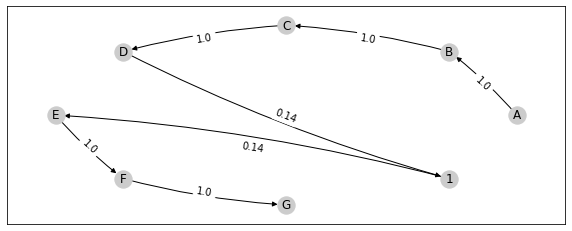

[]


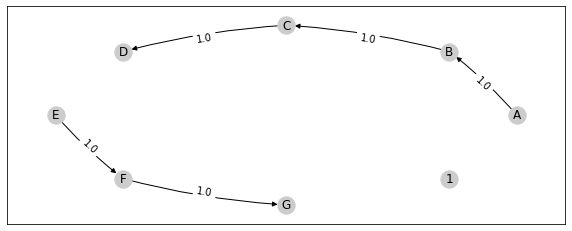

In [66]:
# With noise in the middle
noisy_trace = [
    list("ABCDEFG"),
    list("ABCDEFG"),
    list("ABCDEFG"),
    list("ABCDEFG"),
    list("ABCDEFG"),
    list("ABCDEFG"),

    list("ABCD1EFG")
]
inferred_paths = clique_discovery.infer_paths_from_traces( noisy_trace )
untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ) )


G = clique_discovery.minimally_connected_graph( inferred_paths )
for u, v, frq in [ (u,v , round(G[u][v]['weight'], 2) ) for u,v in G.edges()]:
    if frq < 1/len(noisy_trace):
        G.remove_edge(u, v)

untangled_graph(G)

[]


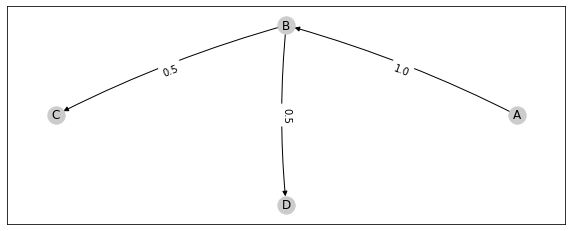

{1.0: [['A', 'B']], 0.5: [['B', 'C'], ['B', 'D'], ['A', 'C'], ['A', 'D']]}

In [67]:
tree_trace = [
    list("ABC"),
    list("ABD"),
]
inferred_paths = clique_discovery.infer_paths_from_traces( tree_trace )
untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ) )
inferred_paths

[]


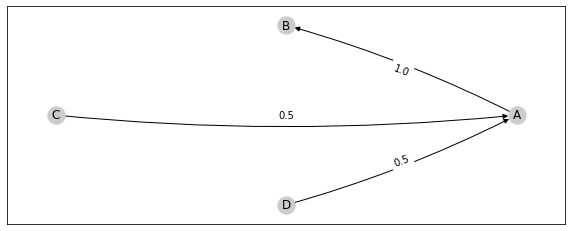

{1.0: [['A', 'B']], 0.5: [['C', 'B'], ['D', 'B'], ['C', 'A'], ['D', 'A']]}

In [68]:
join_trace = [
    list("CAB"),
    list("DAB"),
]
inferred_paths = clique_discovery.infer_paths_from_traces( join_trace )
untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ) )
inferred_paths

[]


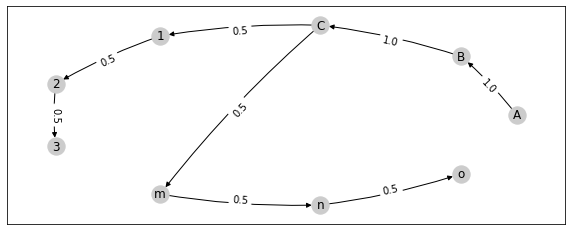

In [69]:
tree_trace = [
    list("ABCmno"),
    list("ABC123"),
]
inferred_paths = clique_discovery.infer_paths_from_traces( tree_trace )
untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ) )
# inferred_paths

[]


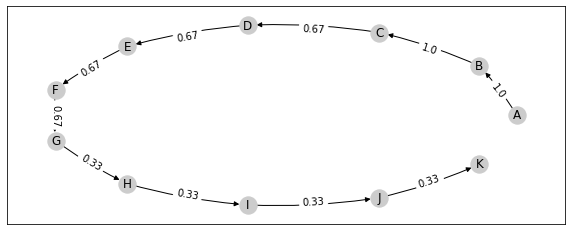

In [70]:
# Concatenation
concatenated_trace = [
    list("ABC"),
    list("ABCDEFG"),
    list("ABCDEFGHIJK"),
]
inferred_paths = clique_discovery.infer_paths_from_traces( concatenated_trace )
untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ) )
# inferred_paths

[]


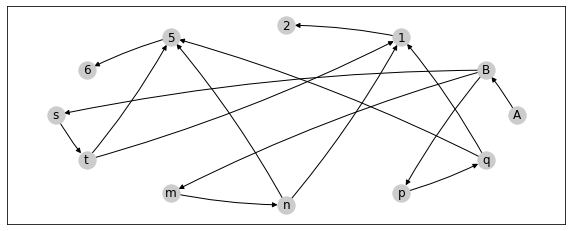

In [71]:
tree_trace = [
    list("ABmn12"),
    list("ABmn56"),
    list("ABpq12"),
    list("ABpq56"),
    list("ABst12"),
    list("ABst56"),
]
inferred_paths = clique_discovery.infer_paths_from_traces( tree_trace )
untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ) , with_weigths=False )
# inferred_paths

## Reduced and in Parallel (very hard)

The notion of parallelism in execution of the traces implies that there is no successor dependency between the threads. This can be achieved analitically in these two ways:

1. Analitically, by having a perfect interleave of each element in both set of traces to ensure that no artificial successors are considered
1. Heuristically, by creating sample traces conforming some construction parameters that amount of loops, trees, etc.

In [74]:
Interleave("ABC", "123")

['ABC123', 'AB1C23', 'AB12C3', 'AB123C', 'A1BC23', 'A1B2C3', 'A1B23C', 'A12BC3', 'A12B3C', 'A123BC', '1ABC23', '1AB2C3', '1AB23C', '1A2BC3', '1A2B3C', '1A23BC', '12ABC3', '12AB3C', '12A3BC', '123ABC']

{0.9999999999999999: [['A', 'B'], ['1', '2']], 0.8333333333333333: [['1', 'B'], ['A', '2']], 0.16666666666666666: [['B', '1'], ['2', 'A']]}


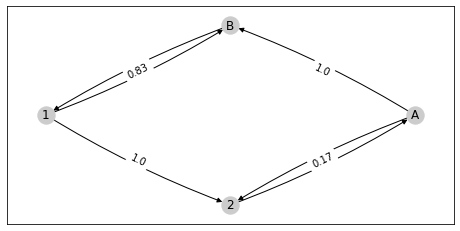

[('A', '2'), ('B', '1'), ('1', 'B'), ('2', 'A')]


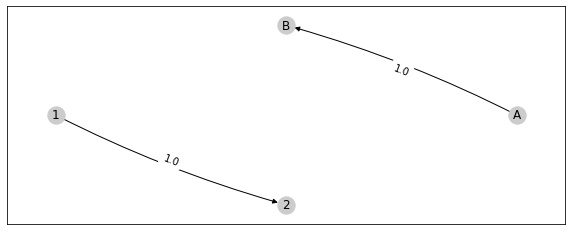

In [75]:
# Two Serials, perfectly interleaved, different size
interleaved_trace = [ list(x) for x in eval(str(Interleave("AB", "12"))) ]
inferred_paths = clique_discovery.infer_paths_from_traces( interleaved_trace )

nice_graph( inferred_paths )
untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ) )

# inferred_paths

{1.0000000000000004: [['A', 'B'], ['1', '2', '3', '4', '5']], 0.9523809523809528: [['1', 'B'], ['A', '5']], 0.8571428571428574: [['2', 'B'], ['A', '4']], 0.7142857142857144: [['3', 'B'], ['B', '5'], ['A', '3'], ['1', 'A']], 0.5238095238095237: [['4', 'B'], ['A', '2']], 0.47619047619047616: [['B', '4'], ['2', 'A']], 0.2857142857142857: [['B', '3'], ['5', 'B'], ['3', 'A'], ['A', '1']], 0.14285714285714285: [['B', '2'], ['4', 'A']], 0.047619047619047616: [['B', '1'], ['5', 'A']]}


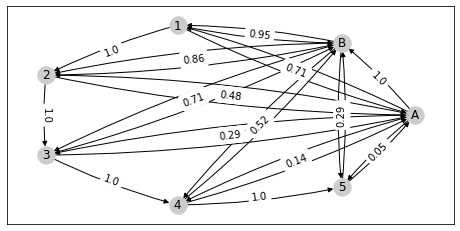

-------
[('A', '1'), ('A', '2'), ('A', '3'), ('A', '4'), ('A', '5'), ('B', '1'), ('B', '2'), ('B', '3'), ('B', '4'), ('B', '5'), ('1', 'A'), ('1', 'B'), ('2', 'A'), ('2', 'B'), ('3', 'A'), ('3', 'B'), ('4', 'A'), ('4', 'B'), ('5', 'A'), ('5', 'B')]


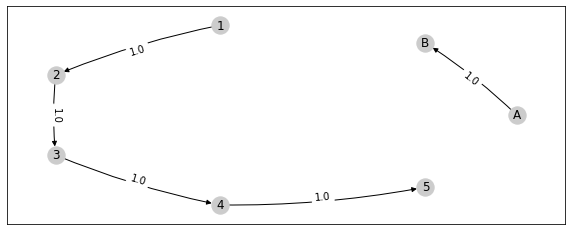

In [97]:
# Two Serials, perfectly interleaved, different size
interleaved_trace = [ list(x) for x in eval(str(Interleave("AB", "12345"))) ]
inferred_paths = clique_discovery.infer_paths_from_traces( interleaved_trace )

nice_graph( inferred_paths )
print("-------")


untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ) )

# inferred_paths


In [77]:
#G, loopweights = clique_discovery.remove_serial_cycles(G, G_bi)

In [78]:
# Gcomp = nx.complement(G_bi.to_undirected()) 
# nx.draw(Gcomp, with_labels=True, color="#DDDDDD")
# for u, v in Gcomp.edges:
#     if (u,v) in G.edges:
#         print (u, v, G.edges[u, v]["weight"])
#     elif (v, u) in G.edges:
#         print (v, u, G.edges[v, u]["weight"])
#     else:
#         print(u, v, "is an artifact")

In [79]:
# for V in nx.algorithms.clique.find_cliques(Gcomp.to_undirected() ):
#     print (V)

{1.999999999999994: [['1', '2', '3']], 1.8285714285714232: [['A', '3']], 1.6428571428571381: [['A', '2']], 1.51428571428571: [['B', '3']], 1.328571428571425: [['A', '1']], 1.214285714285711: [['B', '2']], 1.1285714285714257: [['C', '3']], 0.9999999999999976: [['3', '2', '1'], ['A', 'B', 'C', 'D']], 0.9952380952380928: [['1', 'D']], 0.9761904761904738: [['2', 'D']], 0.9666666666666643: [['1', 'C']], 0.9285714285714264: [['3', 'D']], 0.8809523809523789: [['2', 'C']], 0.8714285714285694: [['B', '1']], 0.8666666666666647: [['1', 'B']], 0.785714285714284: [['C', '2']], 0.7380952380952366: [['3', 'C']], 0.6714285714285702: [['D', '3']], 0.6666666666666654: [['2', 'B']], 0.599999999999999: [['1', 'A']], 0.4857142857142851: [['C', '1']], 0.4523809523809519: [['3', 'B']], 0.357142857142857: [['D', '2']], 0.33333333333333326: [['2', 'A']], 0.17142857142857149: [['D', '1']], 0.1666666666666667: [['3', 'A']]}


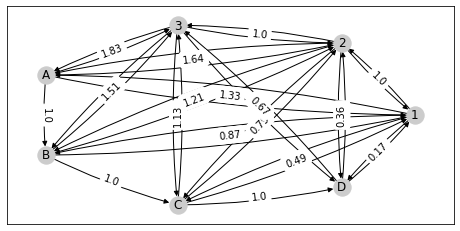

-------


In [95]:
# Serial and loop, in parallel
interleaved_trace = [ list(x) for x in eval(str(Interleave("123123", "ABCD"))) ]
inferred_paths = clique_discovery.infer_paths_from_traces( interleaved_trace )

nice_graph( inferred_paths )
print("-------")

1 A 0.6 1.33
1 B 0.87 0.87
1 C 0.97 0.49
2 A 0.33 1.64
2 B 0.67 1.21
2 C 0.88 0.79
3 A 0.17 1.83
3 B 0.45 1.51
3 C 0.74 1.13
[('1', 'A'), ('1', 'B'), ('1', 'C'), ('2', 'A'), ('2', 'B'), ('2', 'C'), ('2', 'D'), ('3', 'A'), ('3', 'B'), ('3', 'C'), ('3', 'D'), ('A', '1'), ('A', '2'), ('A', '3'), ('B', '1'), ('B', '2'), ('B', '3'), ('C', '1'), ('C', '2'), ('C', '3'), ('D', '2'), ('D', '3')]


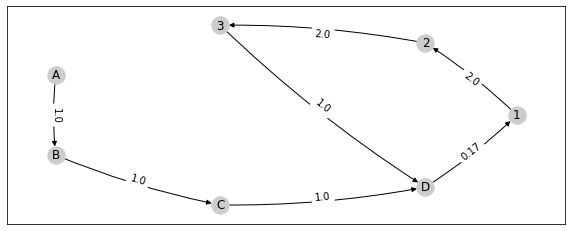

In [96]:
G = clique_discovery.created_auxiliary_graph( inferred_paths )

for a in list("123"):
    for b in list("ABC"):
        try:
            print (a, b, G.edges[a, b]["weight"], G.edges[b, a]["weight"])
        except:
            pass

untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ) )